# Topic modeling with gensim

In this demo we are going to use the topic modeling algorithms provided in the `gensim` package to automatically classify news articles from the Associate Press corpus.

_Warning for instructors: fitting the LDA algorithm might require a few minutes, it's best to show this demo without running the code._

In [1]:
# Useful imports.
%matplotlib inline

from string import punctuation
import numpy as np
import matplotlib.pyplot as plt

import nltk
import gensim

In [3]:
!ls

Movies classification demo.ipynb Topic modeling.ipynb


In [15]:
# Load Associate Press corpus.
corpus = gensim.corpora.BleiCorpus('ap/ap.dat', 'ap/vocab.txt')

The Latent Dirichlet Analysis algorithm classifies each article as a mixture of automatically learned topics.

In [16]:
# Using the optional parameter `alpha` we could control the average number of
# topics per document: the larger `alpha`, the more topics per document
from gensim.models.ldamodel import LdaModel
lda = LdaModel(corpus=corpus, id2word=corpus.id2word, num_topics=50, passes=10)

In [17]:
# Show the words distribution for 10 of the learned topics.
lda.show_topics(10, 7)

['0.039*soviet + 0.016*east + 0.016*union + 0.012*gorbachev + 0.012*german + 0.008*west + 0.007*germany',
 '0.019*vote + 0.018*state + 0.017*candidates + 0.016*campaign + 0.015*voters + 0.014*democratic + 0.013*primary',
 '0.039*police + 0.024*people + 0.014*government + 0.011*students + 0.011*two + 0.009*killed + 0.009*violence',
 '0.014*new + 0.012*dukakis + 0.009*percent + 0.009*york + 0.009*million + 0.009*primary + 0.009*interest',
 '0.031*market + 0.019*prices + 0.014*index + 0.014*million + 0.013*points + 0.013*exchange + 0.013*rose',
 '0.015*police + 0.008*killed + 0.007*city + 0.006*tuesday + 0.006*death + 0.006*military + 0.005*two',
 '0.012*defense + 0.011*billion + 0.011*nuclear + 0.010*pentagon + 0.010*airlines + 0.010*program + 0.010*turkey',
 '0.009*bank + 0.008*first + 0.008*people + 0.007*new + 0.007*water + 0.006*center + 0.006*city',
 '0.011*united + 0.010*states + 0.009*nordstrom + 0.008*dresses + 0.008*new + 0.007*government + 0.006*store',
 '0.031*i + 0.017*dukaki

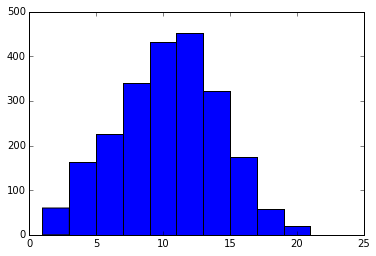

In [18]:
# Show the distribution of number of topics per document.

# Collect the list of topics assigned to each docuemnt.
topics = [lda[c] for c in corpus]
# Collect the number of topics per document.
l = np.array([len(t) for t in topics])

plt.hist(l);

We can visualize the representation of each document as the mixture its topic.

In [19]:
# To see how this could work, have a look at the mixture for one particular document.

# Step 1: get topic mixture.
doc_no = 5
print 'Topics mixture', topics[doc_no]

Topics mixture [(0, 0.34588018437751922), (10, 0.19508995111276919), (12, 0.059177173792784928), (16, 0.031888483113574978), (21, 0.042534375290924367), (23, 0.12206203870960522), (26, 0.040275106129974828), (29, 0.014840220269133838), (36, 0.015692129312993887), (41, 0.013442105709338533), (44, 0.021911673096687487), (45, 0.060315592804394629), (49, 0.017580513691784969)]


In [20]:
# Step 2: For each of the topics in the mixture, ask the LDA object for the top words in the topic.
top_topic = topics[doc_no][0][0]
print lda.show_topic(top_topic, 10)

[(0.0098130304944399893, 'i'), (0.0091951409379181989, 'president'), (0.0071561543819908648, 'new'), (0.0063838061676502085, 'bush'), (0.0048701746169410136, 'officials'), (0.0046131290397106017, 'reagan'), (0.0040774260288948885, 'american'), (0.0038816758236727743, 'last'), (0.0038455750839632651, 'states'), (0.0038173620237506515, 'administration')]


In [21]:
# Step 3: Only keep the words list, discarding the weights.
print [word for _, word in lda.show_topic(top_topic, 10)]

['i', 'president', 'new', 'bush', 'officials', 'reagan', 'american', 'last', 'states', 'administration']


In [22]:
def show_mixture(doc_id):
    """ Print the mixture of topic inferred for one document. """
    mixture = sorted(topics[doc_id], key=lambda x: x[1])
    for topic_nr, proportion in reversed(mixture):
        if proportion < 0.05:
            break
        topic = lda.show_topic(topic_nr, 10)
        top_words = [word for _, word in topic]
        print '{:.3f} * Topic {:2d}: {}'.format(proportion, topic_nr, ', '.join(top_words))


```The Reagan administration is weighing whether to invoke a law authorizing the seizure of tax payments made by U.S. businesses operating in Panama, national security adviser Colin Powell said today. Saying that economic sanctions applied so far ``have not yet created enough pressure'' to force the ouster of strongman Gen. Manuel Antonio Noriega, Powell said ``we are examining additional pressure that might be brought to bear.'' He briefed reporters not long after giving the vacationing President Reagan an update on the Panamanian problem. A senior administration official, disussing Panama on grounds he not be publicly identified, said the United States would encourage any move within the Panamanian Defense Forces to oust Noriega. [...]```

In [23]:
show_mixture(5)

0.346 * Topic  0: i, president, new, bush, officials, reagan, american, last, states, administration
0.195 * Topic 10: panama, noriega, american, allied, test, administration, called, federated, monday, new
0.122 * Topic 23: party, president, government, political, leader, south, africa, house, senate, bill
0.060 * Topic 45: united, states, nordstrom, dresses, new, government, store, says, country, imports
0.059 * Topic 12: iraq, iraqi, kuwait, iran, un, war, troops, gulf, military, talks


``` The Bechtel Group Inc. offered in 1985 to sell oil to Israel at a discount of at least $650 million for 10 years if it promised not to bomb a proposed Iraqi pipeline, a Foreign Ministry official said Wednesday. But then-Prime Minister Shimon Peres said the offer from Bruce Rappaport, a partner in the San Francisco-based construction and engineering company, was ``unimportant,'' the senior official told The Associated Press. Peres, now foreign minister, never discussed the offer with other government ministers, said the official, who spoke on condition of anonymity. [...]```

In [24]:
show_mixture(1)

0.448 * Topic  0: i, president, new, bush, officials, reagan, american, last, states, administration
0.113 * Topic 27: group, dinner, i, greyhound, french, royal, gunter, wedding, british, found
0.083 * Topic 18: company, million, billion, corp, inc, share, offer, percent, black, stock
0.067 * Topic 20: i, years, mrs, two, school, time, prison, ms, first, yearold
0.061 * Topic 12: iraq, iraqi, kuwait, iran, un, war, troops, gulf, military, talks
0.058 * Topic 16: children, country, women, hospital, regulations, lawsuit, government, law, foreigners, doctors


``` NASA scientists rejoiced at ``pretty damn good'' test photos from the Magellan probe today but also grappled with communications difficulties as the spacecraft circled Venus. Fifteen hours after the spacecraft lost contact with Earth on Thursday evening, the signal was re-established. But the signal failed again at midday and was expected to continue to be a problem until scientists could send Magellan new instructions on how to properly aim at Earth, officials said. ```

In [25]:
show_mixture(19)

0.591 * Topic 47: venus, cdy, m, clr, space, galileo, earth, apple, shuttle, spacecraft
0.078 * Topic 20: i, years, mrs, two, school, time, prison, ms, first, yearold
0.067 * Topic  0: i, president, new, bush, officials, reagan, american, last, states, administration
0.059 * Topic 22: people, two, water, ohio, ship, river, county, central, fire, coast


``` Ferrets are increasingly popular as pets, but the weasel-like animals can be dangerous to young children, two doctors say. In three unprovoked attacks, two babies had their ears bitten off by ferrets and required constructive surgery and a third infant suffered scratches and bites requiring 39 stitches, John W. Paisley and Brian A. Lauer write in today's Journal of the American Medical Association. ``Two of the children were asleep in their cribs when they were bitten,'' the two University of Colorado School of Medicine doctors said.```

In [26]:
show_mixture(15)

0.212 * Topic 16: children, country, women, hospital, regulations, lawsuit, government, law, foreigners, doctors
0.168 * Topic 46: fire, police, charged, officials, man, authorities, three, news, miles, five
0.114 * Topic 13: i, new, president, abortion, de, senate, committee, souter, university, south
0.100 * Topic 39: police, killed, city, tuesday, death, military, two, people, four, group
0.089 * Topic 31: drug, aids, study, virus, disease, health, percent, infected, system, immune
0.060 * Topic  6: year, percent, billion, sales, million, last, department, industry, increase, cars
